<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 06 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Analysez les ventes d'une librairie avec R ou Python
<h3 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PARTIE ANALYSE DES DONNEES
</h2>
</div>

In [617]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from IPython.display import Image
from scipy.stats import shapiro,levene,kruskal
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

<div style="border: 1px solid RGB(0,150,250);" >
<h1 style="margin: auto; padding: 20px; color: navy; "> 1.Une analyse des différents indicateurs de vente</h3>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color: blue ; "> 1.1 Analyse descriptive du chiffre d’affaires
</h3>
</div>

In [618]:
# Chargement du fichier CSV 'df_total.csv' en utilisant pandas et en spécifiant les colonnes 'mounth' et 'day' comme dates.
df_total=pd.read_csv('df_total.csv',parse_dates=['mounth','day'])
df_total.head()

,id_prod,session_id,client_id,day,mounth,genre,age,price,categ
0,0_1259,s_1,c_329,2021-03-01,2021-03-01,f,56.0,11.99,0
1,0_1259,s_275943,c_329,2022-10-01,2022-10-01,f,56.0,11.99,0
2,0_1259,s_305291,c_329,2022-12-01,2022-12-01,f,56.0,11.99,0
3,0_1259,s_320153,c_329,2023-01-01,2023-01-01,f,56.0,11.99,0
4,0_1259,s_1519,c_1609,2021-03-04,2021-03-01,m,43.0,11.99,0


In [619]:
# transformer la colonne 'mounth' en extrayant l'année et le mois de la colonne 'day'
df_total['mounth'] = df_total['mounth'].dt.strftime('%Y-%m')
df_total.head()

,id_prod,session_id,client_id,day,mounth,genre,age,price,categ
0,0_1259,s_1,c_329,2021-03-01,2021-03,f,56.0,11.99,0
1,0_1259,s_275943,c_329,2022-10-01,2022-10,f,56.0,11.99,0
2,0_1259,s_305291,c_329,2022-12-01,2022-12,f,56.0,11.99,0
3,0_1259,s_320153,c_329,2023-01-01,2023-01,f,56.0,11.99,0
4,0_1259,s_1519,c_1609,2021-03-04,2021-03,m,43.0,11.99,0


In [620]:
#verification des nobres de lignes ,types et nobre de valeurs non-null pour chaque colonne
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     687534 non-null  object        
 1   session_id  687534 non-null  object        
 2   client_id   687534 non-null  object        
 3   day         687534 non-null  datetime64[ns]
 4   mounth      687534 non-null  object        
 5   genre       687534 non-null  object        
 6   age         687534 non-null  float64       
 7   price       687534 non-null  float64       
 8   categ       687534 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 47.2+ MB


<div style="border: 1px solid RGB(0,150);" >
<h2 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> 1.1.1 Chiffre d'affaire total</h3>
</div>

In [621]:
#calcul du chiffre d'affaire
ca_tot=df_total.price.sum()
print(f"le chiffre d'affaire total est de {ca_tot:,.2f} €")

le chiffre d'affaire total est de 12,027,663.10 €


<div style="border: 1px solid RGB(0,150);" >
<h2 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> 1.1.2 Chiffres d'affaire en fonction de la categorie</h3>
</div>

In [622]:
# agrégation des prix suivant la categorie
df_ca_categ = df_total.groupby('categ')['price'].sum().reset_index()
df_ca_categ.head()

,categ,price
0,0,4419730.97
1,1,4827657.11
2,2,2780275.02


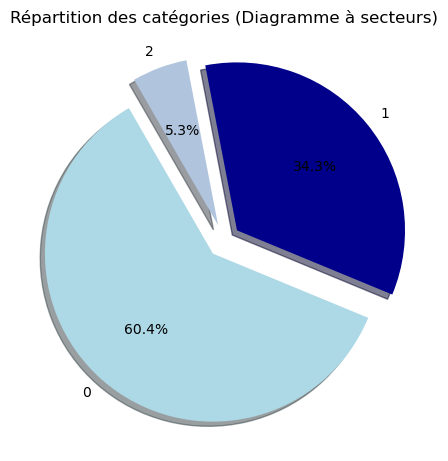

In [623]:
# Calculez le nombre de produits par catégorie
categ_counts = df_total['categ'].value_counts()

# Créez un diagramme à secteurs pour la répartition des catégories
plt.figure(figsize=(12, 12))
plt.subplot(2,2, 4)
colors = ['lightblue', 'darkblue', 'lightsteelblue']
explode = [0.1] * len(categ_counts)
plt.pie(categ_counts, labels=categ_counts.index, autopct='%1.1f%%', colors=colors, shadow=True, startangle=120, explode=explode)
plt.title('Répartition des catégories (Diagramme à secteurs)')
plt.show()

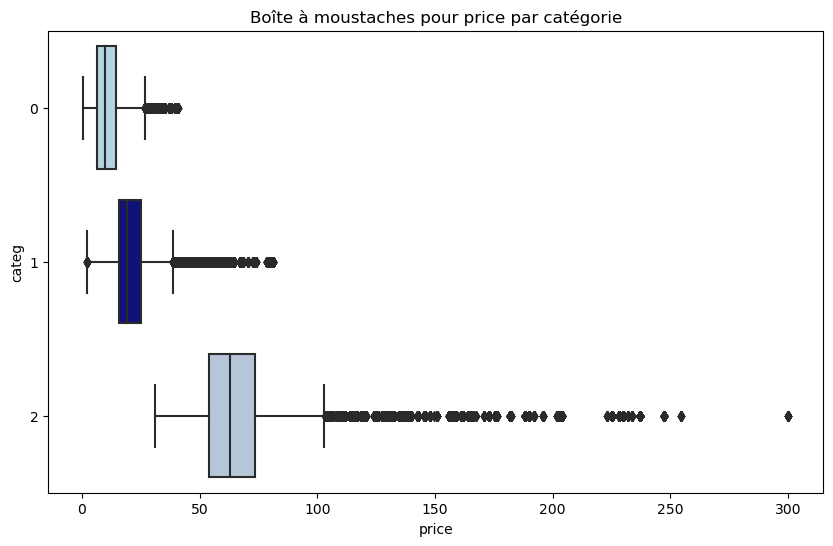

In [624]:
# Définissez votre propre palette de couleurs
custom_palette = ['lightblue', 'darkblue', 'lightsteelblue']

# Créez le graphique en boîte à moustaches horizontal avec une palette de couleurs personnalisée
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_total, y='categ', x='price', orient='h', palette=custom_palette)
plt.title('Boîte à moustaches pour price par catégorie')
plt.show()

<div style="border: 1px solid RGB(0,150);" >
<h4 style="margin: auto; padding: 20px; color:red; "> Suivant ce graph la cause que le CA de la categ 2 est le plus bas c'est qu'il y'a un grand nombre de prix à valeurs abérantes </h3>
</div>

<div style="border: 1px solid RGB();" >
<h2 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> 1.1.3 Chiffre d'affaire en fonction du genre</h3>
</div>

In [625]:
# agrégation des prix suivant le genre
df_ca_genre = df_total.groupby('genre')['price'].sum().reset_index()
df_ca_genre

,genre,price
0,f,5950843.68
1,m,6076819.42


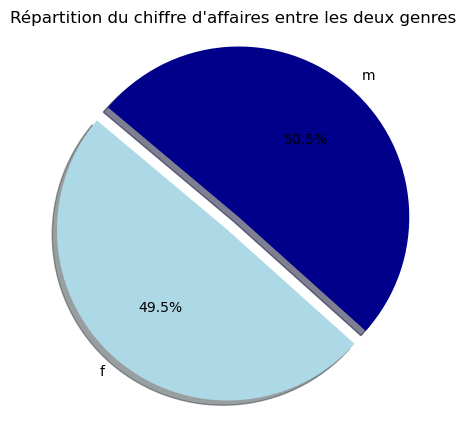

In [626]:
genre = df_ca_genre['genre']
prix = df_ca_genre['price']
couleurs = ['lightblue', 'darkblue']

explosion = (0, 0.1)
plt.figure(figsize=(5, 5))
plt.pie(prix, explode=explosion, labels=genre, colors=couleurs, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Répartition du chiffre d'affaires entre les deux genres")
plt.show()

<div style="border: 1px solid RGB(0,150);" >
<h4 style="margin: auto; padding: 20px; color: red; "> les deux genres homme/femme genérent presque des chiffres d'affaires egale</h3>
</div>

<div style="border: 1px solid RGB(0,150);" >
<h2 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> 1.1.4 Chiffre d'affaire en fonction des produits</h3>
</div>

In [627]:
# agrégation des prix suivant le id_prod
df_ca_produit = df_total.groupby('id_prod')['price'].sum().reset_index()
df_ca_produit = df_ca_produit.sort_values('price',ascending=True)
df_ca_produit.head()

,id_prod,price
595,0_1539,0.99
313,0_1284,1.38
719,0_1653,1.98
1784,0_541,1.99
665,0_1601,1.99


In [628]:
# Calculez le pourcentage cumulé du chiffre d'affaires
df_ca_produit['cumul_price'] =round((df_ca_produit['price'] / df_ca_produit['price'].sum()).cumsum() * 100, 2)
df_ca_produit.head()

,id_prod,price,cumul_price
595,0_1539,0.99,0.0
313,0_1284,1.38,0.0
719,0_1653,1.98,0.0
1784,0_541,1.99,0.0
665,0_1601,1.99,0.0


In [629]:
# nombre de ligne de df_ca_produit
df_ca_produit.shape[0]

3265

In [630]:
# Calculez le pourcentage fixe par produit
df_ca_produit['cumul_prod']=1/df_ca_produit.shape[0]*100
df_ca_produit.head()

,id_prod,price,cumul_price,cumul_prod
595,0_1539,0.99,0.0,0.030628
313,0_1284,1.38,0.0,0.030628
719,0_1653,1.98,0.0,0.030628
1784,0_541,1.99,0.0,0.030628
665,0_1601,1.99,0.0,0.030628


In [631]:
# Calculez le pourcentage cumulé par produit
df_ca_produit['cumul_prod']=round(df_ca_produit.cumul_prod.cumsum(),2)
df_ca_produit.head()

,id_prod,price,cumul_price,cumul_prod
595,0_1539,0.99,0.0,0.03
313,0_1284,1.38,0.0,0.06
719,0_1653,1.98,0.0,0.09
1784,0_541,1.99,0.0,0.12
665,0_1601,1.99,0.0,0.15


In [632]:
# selectionnez les valeurs de cumul_price > 80%
cum_prod = df_ca_produit[df_ca_produit.cumul_price>80].iloc[0,:].cumul_prod    
cum_prod

98.35

In [633]:
# selectionnez la ligne avec cumul_prod = 80%
cum_p = df_ca_produit[df_ca_produit.cumul_prod==80] 
cum_p

,id_prod,price,cumul_price,cumul_prod
1106,0_2002,4540.92,21.68,80.0


C:\Users\Awatef\AppData\Local\Temp\ipykernel_9928\506019634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cum_p['cumul_price']= 21.68


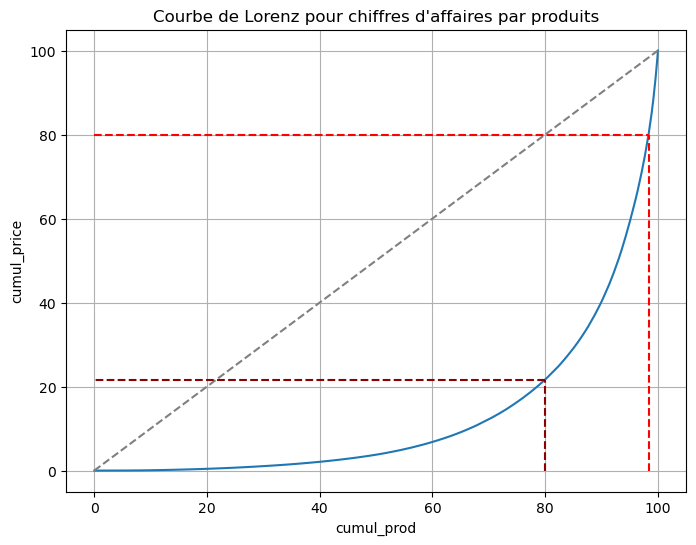

In [634]:
 cum_p['cumul_price']= 21.68
# Créez la courbe de Lorenz pour les chiffres d'affaires par produits
plt.figure(figsize = (8, 6))

plt.plot(df_ca_produit['cumul_prod'], df_ca_produit['cumul_price'], linestyle='-')
plt.plot([0, 100], [0, df_ca_produit['cumul_price'].max()], linestyle='--', color='gray')

plt.plot([0,cum_prod ], [80,80], linestyle='--', color='red')
plt.plot([cum_prod, cum_prod], [0, 80], linestyle='--', color='red')

plt.plot([80, 80], [0,21.68], linestyle='--', color='darkred')
plt.plot([80, 0], [cum_p['cumul_price'], cum_p['cumul_price']], linestyle='--', color='darkred')

plt.xlabel('cumul_prod')
plt.ylabel('cumul_price')
plt.title("Courbe de Lorenz pour chiffres d'affaires par produits")
plt.grid(True)
plt.show()

<div style="border: 1px solid RGB(0,150);">
  <h4 style="margin: auto; padding: 20px; color: red; line-height: 1.5;">
    * 80% des produits générent presque 20% des chiffres d'affaires
    <br>
    * 18,35% des produits restantes générent  60% des chiffres d'affaires  
    <br>
    * Les 1,65 produits derniers  générent par  20%  des chiffres d'affaires
    <br> 
      conclusion: cette analyse refléte la necessité de mettre en valeur les 1,65% des produits les plus rentables
  </h4>
</div>

<div style="border: 1px solid RGB(0,150);" >
<h2 style="margin: auto; padding: 20px; color: slateblue; "> 1.1.4.a- Zoom sur les produits top et flop chiffres d'affairede la librairie</h3>
</div>

## les produits top chiffres d'affaire

In [635]:
top_produits = df_ca_produit[['id_prod', 'price']].sort_values(by='price', ascending=False).head(5)
top_produits

,id_prod,price
3096,2_159,94893.50
3070,2_135,69334.95
3045,2_112,65407.76
3034,2_102,60736.78
3152,2_209,56971.86


## les produits flop chiffres d'affaire

In [636]:
flop_produits = df_ca_produit[['id_prod', 'price']].sort_values(by='price', ascending=False).tail(5)
flop_produits

,id_prod,price
1784,0_541,1.99
2079,0_807,1.99
719,0_1653,1.98
313,0_1284,1.38
595,0_1539,0.99


<div style="border: 1px solid RGB(0,150);">
  <h4 style="margin: auto; padding: 20px; color: red; line-height: 1.5;"> Sur 3 ans il y'a des produits qui n'ont fait que 1 ou 2€  de chiffre d'affaires</h4>
</div>

In [637]:
listprod=list(flop_produits.id_prod)
listprod

['0_541', '0_807', '0_1653', '0_1284', '0_1539']

In [638]:
df_filtered = df_total[df_total['id_prod'].isin(listprod)]
df_filtered.shape[0]

6

## les produits top ventes 

In [639]:
df_filtered.categ.unique()

array([0], dtype=int64)

In [640]:
ventes_produit = df_total.groupby('id_prod')['session_id'].count().reset_index()
ventes_produit = ventes_produit.rename(columns={'session_id': 'ventes'})
ventes_produit.head()

,id_prod,ventes
0,0_0,1242
1,0_1,487
2,0_10,22
3,0_100,3
4,0_1000,432


In [641]:
top_ventes = ventes_produit[['id_prod','ventes']].sort_values(by='ventes', ascending=False).head(5)
top_ventes

,id_prod,ventes
2591,1_369,2340
2644,1_417,2269
2641,1_414,2246
2733,1_498,2202
2653,1_425,2163


## les produits flop ventes 

In [642]:
flop_ventes = ventes_produit[['id_prod','ventes']].sort_values(by='ventes', ascending=False).tail(5)
flop_ventes

,id_prod,ventes
1792,0_549,1
2166,0_886,1
549,0_1498,1
1784,0_541,1
313,0_1284,1


<div style="border: 1px solid RGB(0,150);">
  <h4 style="margin: auto; padding: 20px; color: red; line-height: 1.5;"> Sur 3 ans il y'a des produits qui n'ont fait qu'une seul vente</h4>
</div>

In [643]:
listprod=list(flop_ventes.id_prod)
listprod

['0_549', '0_886', '0_1498', '0_541', '0_1284']

In [644]:
df_filtered1 = df_total[df_total['id_prod'].isin(listprod)]
df_filtered1

,id_prod,session_id,client_id,day,mounth,genre,age,price,categ
680869,0_1498,s_167516,c_1938,2022-02-19,2022-02,f,44.0,2.48,0
686765,0_541,s_3676,c_1869,2021-03-08,2021-03,f,38.0,1.99,0
687099,0_1284,s_20477,c_1551,2021-04-14,2021-04,m,51.0,1.38,0
687378,0_886,s_7410,c_7219,2021-03-17,2021-03,f,57.0,21.82,0
687506,0_549,s_18930,c_4202,2021-04-11,2021-04,f,36.0,2.99,0


In [645]:
df_filtered1.categ.unique()

array([0], dtype=int64)

<div style="border: 1px solid RGB(0,150);" >
<h2 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> 1.1.5 Chiffre d'affaire en fonction des clients</h3>
</div>

In [646]:
# agrégation des prix suivant la colonne client_id
df_ca_client = df_total.groupby('client_id')['price'].sum().reset_index()
df_ca_client = df_ca_client.sort_values('price',ascending=True)
df_ca_client.head()

,client_id,price
8151,c_8351,6.31
7918,c_8140,8.30
7889,c_8114,9.98
4044,c_4648,11.20
3855,c_4478,13.36


In [647]:
# Calculez le pourcentage cumulé du chiffre d'affaires
df_ca_client['cumul_price'] = round((df_ca_client['price'] / df_ca_client['price'].sum()).cumsum() * 100, 2)
df_ca_client

,client_id,price,cumul_price
8151,c_8351,6.31,0.00
7918,c_8140,8.30,0.00
7889,c_8114,9.98,0.00
4044,c_4648,11.20,0.00
3855,c_4478,13.36,0.00
...,...,...,...
634,c_1570,5285.82,92.65
2724,c_3454,114110.57,93.60
6337,c_6714,153918.60,94.88
4388,c_4958,290227.03,97.29


In [648]:
df_ca_client.shape[0]

8600

In [649]:
# Calculez le pourcentage fixe par client
df_ca_client['cumul_client']=1/df_ca_client.shape[0]*100
# Calculez le pourcentage cumulé par client
df_ca_client['cumul_client']=round(df_ca_client.cumul_client.cumsum(),2)
df_ca_client.tail(10)

,client_id,price,cumul_price,cumul_client
7715,c_7959,5135.75,92.43,99.90
7006,c_7319,5155.77,92.47,99.91
2108,c_2899,5214.05,92.52,99.92
1268,c_2140,5260.18,92.56,99.93
2513,c_3263,5276.87,92.60,99.94
634,c_1570,5285.82,92.65,99.95
2724,c_3454,114110.57,93.60,99.97
6337,c_6714,153918.60,94.88,99.98
4388,c_4958,290227.03,97.29,99.99
677,c_1609,326039.89,100.00,100.00


In [650]:
# selectionnez la ligne avec cumul_price >92%
cum_c1 = df_ca_client[df_ca_client.cumul_price >92]
cum_c1

,client_id,price,cumul_price,cumul_client
8469,c_880,4897.19,92.01,99.78
8195,c_8392,4934.01,92.05,99.79
1772,c_2595,4959.66,92.09,99.80
4726,c_5263,5006.85,92.13,99.81
3870,c_4491,5025.05,92.18,99.83
973,c_1876,5026.60,92.22,99.84
1673,c_2505,5059.35,92.26,99.85
7791,c_8026,5082.58,92.30,99.86
7120,c_7421,5097.18,92.34,99.87
470,c_1422,5131.36,92.39,99.88


In [651]:
cum_c1.shape

(20, 4)

In [652]:
ca_client_pro=cum_c1.iloc[0,:].cumul_price 
ca_client_pro

92.01

In [653]:
# Sélectionnez les valeurs de cumul_price >92%
cum_client = df_ca_client[df_ca_client.cumul_price >92].iloc[0,:].cumul_client    
cum_client

99.78

In [654]:
# selectionnez la ligne avec cum_client = 80%
cum_c = df_ca_client[df_ca_client.cumul_client==80] 
cum_c

,client_id,price,cumul_price,cumul_client
2627,c_3366,2024.06,51.86,80.0


In [655]:
ca_client_80 = cum_c.iloc[0,:].cumul_price 
ca_client_80

51.86

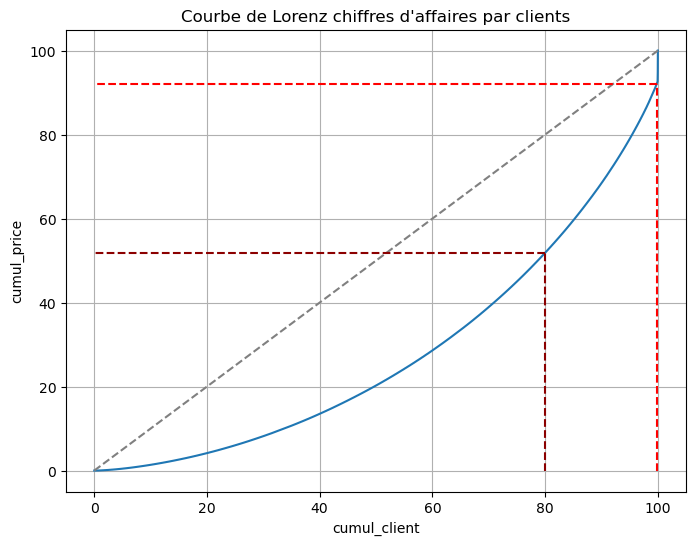

In [656]:
## Créez la courbe de Lorenz pour les chiffres d'affaires par clients
cum_client=99.78
plt.figure(figsize=(8, 6))
plt.plot(df_ca_client['cumul_client'], df_ca_client['cumul_price'], linestyle='-')
plt.plot([0, 100], [0, df_ca_client['cumul_price'].max()], linestyle='--', color='gray')


plt.plot([cum_client, 0], [ca_client_pro, ca_client_pro], linestyle='--', color='red')
plt.plot([cum_client, cum_client], [0, ca_client_pro], linestyle='--', color='red')

plt.plot([80, 80], [0, ca_client_80], linestyle='--', color='darkred')
plt.plot([80, 0], [cum_c['cumul_price'], cum_c['cumul_price']], linestyle='--', color='darkred')

plt.xlabel('cumul_client')
plt.ylabel('cumul_price')
plt.title("Courbe de Lorenz chiffres d'affaires par clients")
plt.grid(True)
plt.show()

<div style="border: 1px solid RGB(0,150);">
  <h4 style="margin: auto; padding: 20px; color: red; line-height: 1.5;">
    * 80% des clients générent presque 52% des chiffres d'affaires
    <br>
    * 19.08% des clients restants générent 40% des chiffres d'affaires, 
    <br> 
     * 0.92% derniers des clients générent 8% des chiffres d'affaires
   </h4></div>

In [657]:
top_client = list(df_ca_client[df_ca_client.cumul_price >93].client_id)  
top_client

['c_3454', 'c_6714', 'c_4958', 'c_1609']

In [658]:
# selection des lignes qui correspond au top_client
df_total[df_total.client_id.isin(top_client)].head()

,id_prod,session_id,client_id,day,mounth,genre,age,price,categ
4,0_1259,s_1519,c_1609,2021-03-04,2021-03,m,43.0,11.99,0
5,0_1259,s_53058,c_1609,2021-06-24,2021-06,m,43.0,11.99,0
6,0_1259,s_53165,c_1609,2021-06-24,2021-06,m,43.0,11.99,0
7,0_1259,s_96014,c_1609,2021-09-26,2021-09,m,43.0,11.99,0
8,0_1259,s_105418,c_1609,2021-10-16,2021-10,m,43.0,11.99,0


In [659]:
# suppression des lignes qui correspond au top_client
df_total.drop(df_total[df_total.client_id.isin(top_client)].index,inplace=True)
df_total[df_total.client_id.isin(top_client)]

,id_prod,session_id,client_id,day,mounth,genre,age,price,categ


<div style="border: 1px solid RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color: blue ; "> 1.2 L'évolution du chiffres d'affaire</h3>
</div>  

<div style="border: 1px solid RGB(0,150);" >
<h2 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> 1.2.1 Chiffres d'affaire par mois</h3>
</div>

In [706]:
df_total.head()

,id_prod,session_id,client_id,day,mounth,genre,age,price,categ
0,0_1259,s_1,c_329,2021-03-01,2021-03,f,56.0,11.99,0
1,0_1259,s_275943,c_329,2022-10-01,2022-10,f,56.0,11.99,0
2,0_1259,s_305291,c_329,2022-12-01,2022-12,f,56.0,11.99,0
3,0_1259,s_320153,c_329,2023-01-01,2023-01,f,56.0,11.99,0
18,0_1259,s_149171,c_1478,2022-01-13,2022-01,f,51.0,11.99,0


In [707]:
# Regroupez les données par mois et calculez la somme des prix pour chaque mois
prix_mensuels = df_total.groupby('mounth')['price'].sum().reset_index()
prix_mensuels.head()

,mounth,price
0,2021-03,445918.71
1,2021-04,439337.85
2,2021-05,454887.46
3,2021-06,447102.17
4,2021-07,447593.15


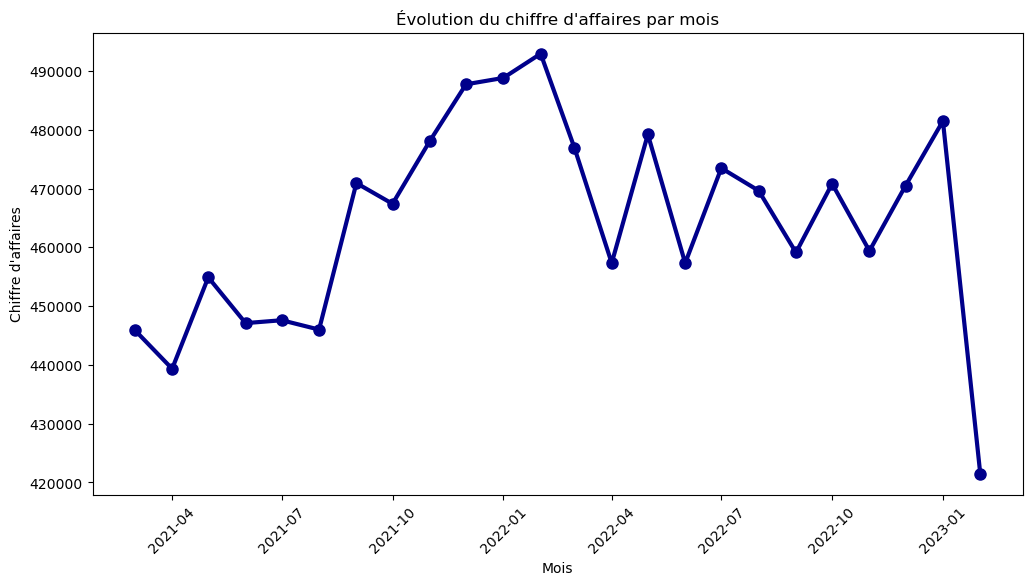

In [708]:
# Convertissez la colonne 'mois' en un format de date pour le tri chronologique
prix_mensuels['mounth'] = pd.to_datetime(prix_mensuels['mounth'])

# Triez les données par mois (par ordre chronologique)
prix_mensuels = prix_mensuels.sort_values(by='mounth')

# Créez le graphique de l'évolution du chiffre d'affaires par mois
plt.figure(figsize=(12, 6))
plt.plot(prix_mensuels['mounth'], prix_mensuels['price'], marker='o', color='darkblue', linestyle='-', linewidth=3, markersize=8)
plt.xlabel('Mois')
plt.ylabel("Chiffre d'affaires")
plt.title("Évolution du chiffre d'affaires par mois")
plt.xticks(rotation=45)
plt.show()

<div style="border: 1px solid RGB(0,150);" >
<h4 style="margin: auto; padding: 20px; color: red; "> l'évolution des chiffres d'affaires par Mois suggére que le plus hautd pic du chiffre d'affaires c'est en 02/2022</h3>
</div>

<div style="border: 1px solid RGB(0,150);" >
<h2 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> 1.2.2 Décomposition saisonniére du chiffre d'affaires </h3>
</div>

In [709]:
prix_mensuels.head(20)

,mounth,price
0,2021-03-01,445918.71
1,2021-04-01,439337.85
2,2021-05-01,454887.46
3,2021-06-01,447102.17
4,2021-07-01,447593.15
5,2021-08-01,446002.30
6,2021-09-01,470921.80
7,2021-10-01,467397.22
8,2021-11-01,478092.08
9,2021-12-01,487723.40


In [717]:
# Trier les données par mois
prix_mensuels = prix_mensuels.sort_values('mounth')

# Calcul de la moyenne mobile sur une fenêtre de 3 mois
prix_mensuels['moyenne_mobile_3'] = prix_mensuels['price'].rolling(window=3).mean()
prix_mensuels['moyenne_mobile_4'] = prix_mensuels['price'].rolling(window=4).mean()

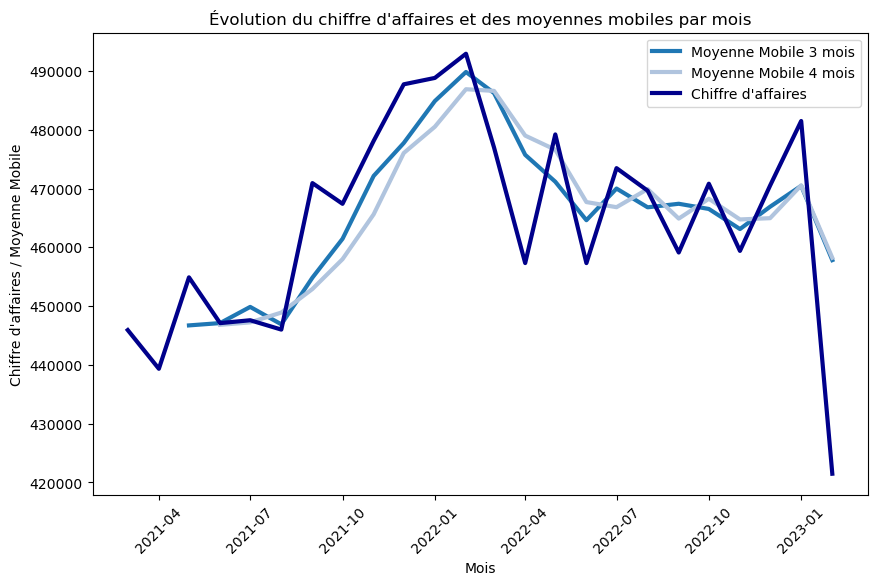

In [718]:
plt.figure(figsize=(10, 6))
# Tracé des courbes de moyennes mobiles de 3 et 5 mois
plt.plot(prix_mensuels['mounth'], prix_mensuels['moyenne_mobile_3'], label='Moyenne Mobile 3 mois', linestyle='-', linewidth=3, markersize=8)
plt.plot(prix_mensuels['mounth'], prix_mensuels['moyenne_mobile_4'], label='Moyenne Mobile 4 mois', linestyle='-', linewidth=3, markersize=8, color='lightsteelblue')

# Tracé de la courbe initiale 'mounth' (mois)
plt.plot(prix_mensuels['mounth'], prix_mensuels['price'], label='Chiffre d\'affaires',  color='darkblue', linestyle='-', linewidth=3, markersize=8)

plt.xlabel('Mois')
plt.ylabel("Chiffre d'affaires / Moyenne Mobile")
plt.title("Évolution du chiffre d'affaires et des moyennes mobiles par mois")
plt.xticks(rotation=45)
plt.legend()
plt.show()


<div style="border: 1px solid RGB(0,150);" >
<h4 style="margin: auto; padding: 20px; color: red; "> le lissage par myenne mobile de la courbe de l'evolution du chiffre d'affaires par mois montre une certaine stabilité à partir du mois d'Aout ce qui suggére la persistance de cette situation pour les mois prochain </h3>  </div> 

<div style="border: 1px solid RGB(0,150,250);" >
<h1 style="margin: auto; padding: 20px; color: navy; "> 2.Une analyse plus ciblée sur les clients</h3>
</div>

<div style="border: 1px solid RGB(0,150);" >
<h2 style="margin: auto; padding: 20px; color: slateblue; "> 1.1.6.a Analyse univarié pour  la variable age</h3>
</div>'

In [682]:
# Echantillon l'âge
df_total['age']

0         56.0
1         56.0
2         56.0
3         56.0
18        51.0
          ... 
687529    30.0
687530    32.0
687531    78.0
687532    78.0
687533    78.0
Name: age, Length: 640734, dtype: float64

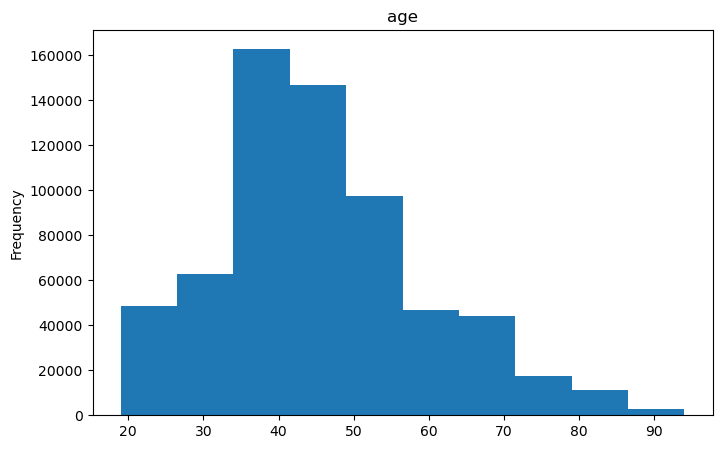

In [683]:
# Histogramme : Représentation graphique de la distribution des âges
ax = df_total['age'].plot(kind='hist', figsize=(8, 5), title='age')

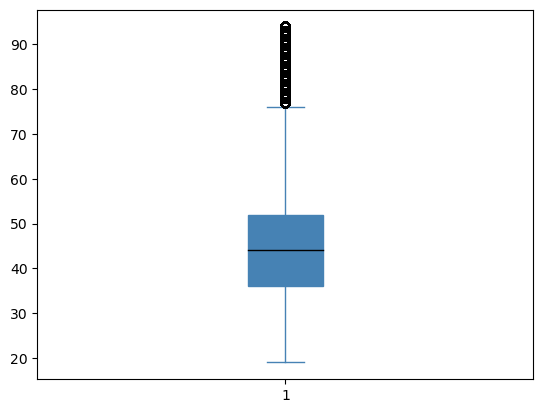

In [684]:
# Boxplot : Visualisation graphique des mesures statistiques clés de l'âge
fig, ax = plt.subplots()
box = ax.boxplot(df_total['age'], patch_artist=True)
for box_element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(box[box_element], color='steelblue')
# Couleur de la médiane
plt.setp(box['medians'], color='black')
plt.show()

## Distribution des âges et courbe de distribution

## Mesures de tendance centrale et de dispersion

In [685]:
moyenne_age = np.mean(df_total['age'])
moyenne_age

45.20797554055193

In [686]:
moyenne_age_max = moyenne_age*1.1
moyenne_age_max

49.72877309460713

In [687]:
moyenne_age_min = moyenne_age*0.9
moyenne_age_min

40.687177986496735

In [688]:
medianne_age = np.median(df_total['age'])
medianne_age

44.0

In [689]:
from scipy import stats
moyenne_tronque=stats.trim_mean(df_total['age'], 0.05)
moyenne_tronque

44.745613548317735

In [690]:
std=np.std(df_total['age'])
std

13.879671464043488

In [691]:
coeff_variation=std/moyenne_age
coeff_variation

0.30701820415721354

In [692]:
# Conditions
condition = (medianne_age * 0.9 <= moyenne_tronque) and (moyenne_tronque <= medianne_age * 1.1)

# Si la condition est vraie, retourner 'vrai', sinon, retourner 'faux'
resultat = 'moyenne_tronque vrai' if condition else 'moyenne_tronque faux'

print(resultat)

moyenne_tronque vrai


<div style="border: 1px solid RGB(0,150);">
  <h4 style="margin: auto; padding: 20px; color: red; line-height: 1.5;"> la moyenne des âges sans les valeurs extrêmes est proche de la médiane, ce qui suggère que la majorité des âges se regroupent autour de la médiane.</h4>
</div>

In [693]:
# Conditions
condition = (moyenne_age_min <= medianne_age) and (medianne_age <= moyenne_age_max)

# Si la condition est vraie, retourner 'vrai', sinon, retourner 'faux'
resultat = 'medianne vrai' if condition else 'medianne faux'

print(resultat)

medianne vrai


<div style="border: 1px solid RGB(0,150);">
  <h4 style="margin: auto; padding: 20px; color: red; line-height: 1.5;"> cela signifie que la médiane de l'âge se trouve dans une plage acceptable, ce qui suggère que la distribution des âges est centrée autour de cette médiane. </h4>
</div>

In [694]:
# Conditions
condition = coeff_variation < 0.33
# Si la condition est vraie, retourner 'vrai', sinon, retourner 'faux'
resultat = 'coeff_variance vrai' if condition else 'coeff_variation faux'

print(resultat)

coeff_variance vrai


<div style="border: 1px solid RGB(0,150);">
  <h4 style="margin: auto; padding: 20px; color: red; line-height: 1.5;"> la variation relative les âges par rapport à la moyenne est faible,cela suggère une faible dispersion des âges par rapport à la moyenne, ce qui peut indiquer une certaine homogénéité dans le groupe.</h4>
</div>

<div style="border: 1px solid RGB(0,150);">
  <h4 style="margin: auto; padding: 20px; color: red; line-height: 1.5;"> Conclusion:LA MOYENNE EST REPRESENTATIVE</h4>
</div>

## Analyse de forme 

In [695]:
kurt_pvalue=stats.kurtosistest(df_total['age'])
kurt_pvalue

KurtosistestResult(statistic=45.27775505278857, pvalue=0.0)

<div style="border: 1px solid RGB(0,150);">
  <h4 style="margin: auto; padding: 20px; color: red; line-height: 1.5;"> La valeur statistique de kurtosis est élevée, signalant une forte concentration de données dans les queues de la distribution des âges.
      
La p-value < 0.05, cela suggère un rejet de l'H0, donc la distribution des âges ne suit pas une distribution normale.</h4>
</div>

In [696]:
skew_pvalue=stats.skewtest(df_total['age'])
skew_pvalue

SkewtestResult(statistic=178.1151065713239, pvalue=0.0)

<div style="border: 1px solid RGB(0,150);">
  <h4 style="margin: auto; padding: 20px; color: red; line-height: 1.5;"> skewness est considérablement élevée ce qui montre un écart important par rapport à une distribution normale.
      
La p-value est très faible (0.0), donc le rejeter l'H0 alors la distribution des âges est asymétrique</h4>
</div>

## Traitement des valeurs aberrantes (outliers)

In [697]:
# identifier les outliers:les valeurs en dehors de la plage [Q1- 1.5 * IQR,Q3+ 1.5 * IQR]

q1 = df_total['age'].quantile(0.25)
q3 = df_total['age'].quantile(0.75)

# Calcul de la plage interquartile (IQR)
iqr = q3 - q1

# Définition des seuils pour détecter les valeurs aberrantes
seuil_inf = q1 - 1.5 * iqr
seuil_sup = q3 + 1.5 * iqr

# Filtrer les valeurs aberrantes
outliers =df_total[( df_total['age'] < seuil_inf) | (df_total['age'] >seuil_sup)]
outliers.shape

(17877, 9)

In [723]:
# Supprimez les outliers du DataFrame d'origine
df_total_cleaned = df_total.drop(outliers.index)

# Affichage des statistiques du DataFrame nettoyé
df_total_cleaned.describe()

,age,price,categ
count,622857.000000,622857.000000,622857.000000
mean,44.140353,17.405897,0.442838
std,12.523598,18.174789,0.592973
min,19.000000,0.620000,0.000000
25%,36.000000,8.880000,0.000000
50%,43.000000,13.990000,0.000000
75%,51.000000,18.990000,1.000000
max,76.000000,300.000000,2.000000


## Analyse de forme sans les valeurs abérantes

In [727]:
kurt_pvalue=stats.kurtosistest(df_total_cleaned['age'])
kurt_pvalue

KurtosistestResult(statistic=-34.912317238076845, pvalue=4.834716818913531e-267)

In [728]:
skew_pvalue=stats.skewtest(df_total_cleaned['age'])
skew_pvalue

SkewtestResult(statistic=93.82260126962638, pvalue=0.0)

<div style="border: 1px solid RGB(0,150);">
  <h4 style="margin: auto; padding: 20px; color: red; line-height: 1.5;"> Ces résultats suggèrent fortement que la distribution des données d'âge n'est pas conforme à une distribution normale, mais plutôt qu'elle est asymétrique et possède un aplatissement.</h4>
</div>

## Le test de normalité de Shapiro-Wilk 

In [729]:
# Effectuer le test de Shapiro-Wilk pour évaluer la normalité
stat, p = shapiro(df_total_cleaned['age'])
print("P-valeur:", p)
print("Statistique de test:", stat)

P-valeur: 0.0
Statistique de test: 0.9848930239677429


<div style="border: 1px solid RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color: blue ; "> 2.1  Analyse bivarié entre genre (categ) et catégorie du livre(categ)
</h3>
</div>

In [565]:
df_total[['genre', 'categ']]

,genre,categ
0,f,0
1,f,0
2,f,0
3,f,0
18,f,0
...,...,...
687529,m,2
687530,m,0
687531,m,1
687532,m,1


In [566]:
# Création d'une table croisée entre les colonnes 'categ' et 'genre'
table_croisee = pd.crosstab(df_total['categ'],df_total['genre'])
table_croisee

genre,f,m
categ,,
0,200793,186488
1,115721,104884
2,16980,15868


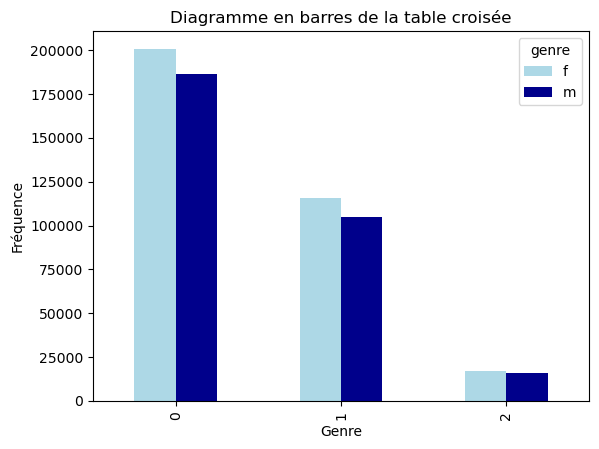

In [567]:
colors = ['lightblue', 'darkblue', 'steelblue'] 

table_croisee.plot.bar(color=colors)
plt.title("Diagramme en barres de la table croisée")
plt.xlabel("Genre")
plt.ylabel("Fréquence")
plt.show()

In [568]:
# Calcul du test du chi-deux pour l'indépendance entre les variables genre et catégories
Resultat = chi2_contingency(table_croisee)
Resultat

Chi2ContingencyResult(statistic=22.66856665178056, pvalue=1.1955928116587024e-05, dof=2, expected_freq=array([[201574.89662481, 185706.10337519],
       [114822.13191434, 105782.86808566],
       [ 17096.97146086,  15751.02853914]]))

<div style="border: 1px solid RGB(0,150);" >
<h4 style="margin: auto; padding: 20px; color: red; "> chi2,P-value < 0.05 donc les variables genre et catégorie sont dépendante et la relation statistique significative </h3>  </div> 

In [569]:
chi2= Resultat[0]
chi2

22.66856665178056

In [570]:
# Création d'une table croisée pour examiner la distribution conjointe des variables 'categ' et 'genre'
table_croisee = pd.crosstab(df_total['categ'],df_total['genre'], margins= True)
table_croisee.head()

genre,f,m,All
categ,,,
0,200793,186488,387281
1,115721,104884,220605
2,16980,15868,32848
All,333494,307240,640734


In [571]:
n=table_croisee.loc['All','All']
n

640734

In [572]:
#Calcul de la statistique de Cramér mesure la force de l'association à partir du résultat du test du chi2
v_cramer= np.sqrt(chi2/(n*1))
v_cramer

0.005948029928802536

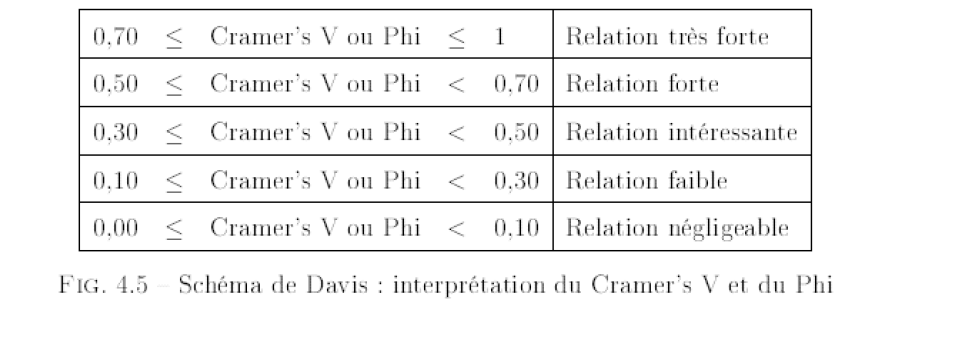

In [582]:
# Insérer une image depuis un fichier local
Image(filename='C:\\Users\\Awatef\\Desktop\\table de v_cramer.png')


<div style="border: 1px solid RGB(0,150);" >
<h4 style="margin: auto; padding: 20px; color: red; ">v_cramer mesure la forme de l'association entre les 2 variables
    
 <h4 style="margin: auto; padding: 20px; color: red; "> Suivant le tableau au dessus, v_cramer< 0.1 donc la relation entre les 2 variables genre et catégorie est négligeable</h3>  </div> 

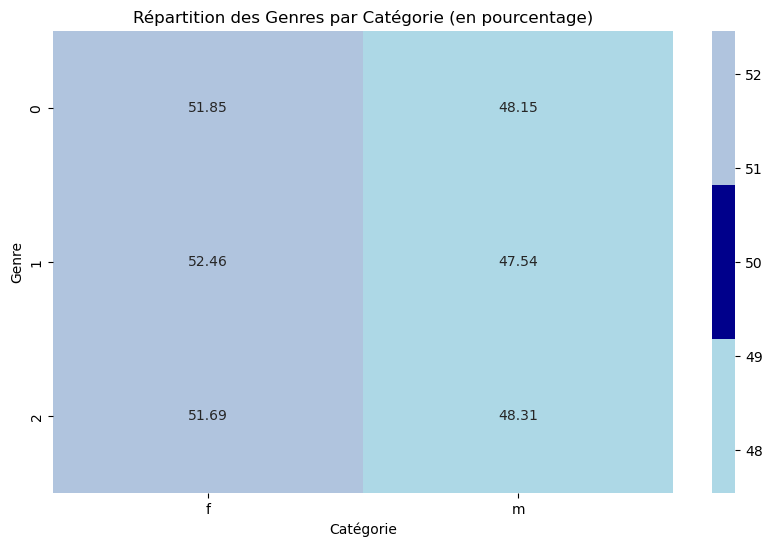

In [574]:
# Votre table croisée des genres par catégorie
table_croisee = pd.crosstab(df_total['categ'], df_total['genre'])

# Convertir les valeurs en pourcentages par ligne
table_croisee_percent = table_croisee.div(table_croisee.sum(axis=1), axis=0) * 100

# Créer une palette de couleurs personnalisée
custom_palette = ['lightblue', 'darkblue', 'lightsteelblue']

# Créer le graphique de la Répartition des Genres par Catégorie avec les pourcentages et le signe %
plt.figure(figsize=(10, 6))
sns.heatmap(table_croisee_percent, cmap=custom_palette, annot=True, fmt=".2f")  # fmt=".1f%%" pour formater les pourcentages avec le signe %
plt.title("Répartition des Genres par Catégorie (en pourcentage)")
plt.xlabel("Catégorie")
plt.ylabel("Genre")
plt.show()

<div style="border: 1px solid RGB(0,150);" >
<h4 style="margin: auto; padding: 20px; color: red; "> 51.58% des femmes achétent des livres categorie 0 alors que  48.15% d'hommes achétent la meme catégorie
    
    
52.46% des femmes achétent des livres categorie 1  alors que  47.54% d'hommes achétent la meme catégorie    
51.69% des femmes achétent des livres categorie 2  alors que  48.31% d'hommes achétent la meme catégorie     </h3>  </div> 

<div style="border: 1px solid RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color: blue ; "> 2.2 Analyse bivarié entre âge (quanti) et catégorie du livre(categ)
</h3>
</div>

In [575]:
df_total[['age', 'categ']].head()

,age,categ
0,56.0,0
1,56.0,0
2,56.0,0
3,56.0,0
18,51.0,0


## Exploration des données

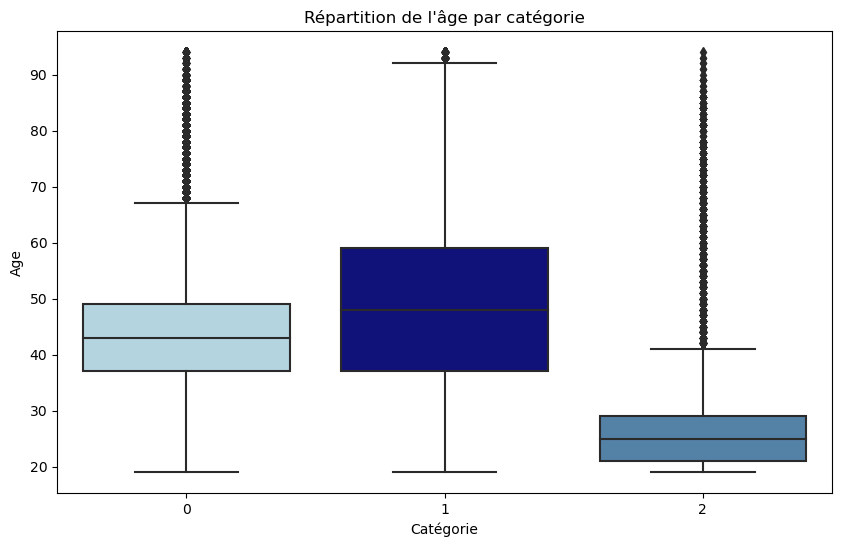

In [576]:
# Données
data = pd.DataFrame({'Age': df_total['age'], 'Catégorie': df_total['categ']})

# Couleurs personnalisées
colors = ['lightblue', 'darkblue', 'steelblue']

# Créer un boxplot avec les couleurs personnalisées
plt.figure(figsize=(10, 6))
sns.boxplot(x='Catégorie', y='Age', data=data, palette=colors)
plt.title('Répartition de l\'âge par catégorie')
plt.show()


 ## Etape 1:le modèle conceptuel:  </h3>


### l'age des clients influence la catégorie des livres achetés

## Etape 2: fixer le risque  

### α=0,05

## Etape3: Prérequis 

<div style="border: 1px solid RGB(0,150);" >
<h2 style="margin: auto; padding: 20px; color: slateblue; ">a. Test de normalité pour tout les sous-groupes</h3>
</div>'

## l'hypothére 

H0 l'echantillon suit une loi normale

H1 l'echantillon ne suit pas une loi normale

si p-value < 0.05 on rejette H0 et on accepte H1 cà dire l'echantillon ne suit pas une loi normale

si p-value > 0.05 on accepte H0  l'echantillon  suit  une loi normale

In [577]:
shapiro(df_total[df_total['categ']==0].age)

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9347574710845947, pvalue=0.0)

In [578]:
shapiro(df_total[df_total['categ']==1].age)

ShapiroResult(statistic=0.9879432916641235, pvalue=0.0)

In [579]:
shapiro(df_total[df_total['categ']==2].age)

ShapiroResult(statistic=0.6740533709526062, pvalue=0.0)

<div style="border: 1px solid RGB(0,150);" >
<h4 style="margin: auto; padding: 20px; color: red; ">Les shapiro p-value < 0.05 donc on rejette H0 et on accepte H1 cà dire les  echantillons des sous-groupes ne suivent pas une loi normale</h3>  </div> 

<div style="border: 1px solid RGB(0,150);" >
<h2 style="margin: auto; padding: 20px; color: slateblue; "> b. Test d'egalité des variances (de Levene)</h3>
</div>'

## l'hypothése 

H0 toutes les variances de sous-groupes sont egales

H1 au moins un sous-groupe a une variance différentes des autres

si p-value < 0.05 on rejette H0 et on accepte H1 cà dire au moins un sous-groupe a une variance différentes des autres

si p-value > 0.05 on accepte H0  toutes les variances de sous-groupes sont egales

In [580]:
levene(df_total[df_total['categ']==0].age,df_total[df_total['categ']==1].age,df_total[df_total['categ']==2].age)

LeveneResult(statistic=24651.78036728431, pvalue=0.0)

<div style="border: 1px solid RGB(0,150);" >
<h4 style="margin: auto; padding: 20px; color: red; ">levene p-value < 0.05 on rejette H0 et on accepte H1 cà dire au moins un sous-groupe a une variance différentes des autres</h3>  </div> 

<div style="border: 1px solid RGB(0,150);" >
<h4 style="margin: auto; padding: 20px; color: red; ">les prérequis ne sont pas satisfait donc on ne peut pas passer un test paramétrique ANOVA , on passe un test non paramétrique basé sur la medianne kruskal-wallis</h3>  </div> 

<div style="border: 1px solid RGB(0,150);" >
<h2 style="margin: auto; padding: 20px; color: slateblue; "> c. Test d'egalité des mediannes (de kruskal-wallis)</h3>
</div>'

## l'hypothése 

H0 toutes les mediannes de sous-groupes sont egales

H1 au moins un sous-groupe a une medianne différentes des autres

si p-value < 0.05 on rejette H0 et on accepte H1 cà dire au moins un sous-groupe a une medianne différentes des autres

si p-value > 0.05 on accepte H0  toutes les mediannes de sous-groupes sont egales

In [581]:
kruskal(df_total[df_total['categ']==0].age,df_total[df_total['categ']==1].age,df_total[df_total['categ']==2].age)

KruskalResult(statistic=71359.73412120914, pvalue=0.0)

<div style="border: 1px solid RGB(0,150);" >
<h4 style="margin: auto; padding: 20px; color: red; ">kruskal, p-value < 0.05 on rejette H0 et on accepte H1 c à dire au moins un sous-groupe a une medianne différentes des autres</h3>  </div> 

<div style="border: 1px solid RGB(0,150);" >
<h4 style="margin: auto; padding: 20px; color: red; "> Au moin une mediannne d'age d'une la catégorie de livre est différente des autres mediannnes d'age des catégories de livres</h3>  </div> 

<div style="border: 1px solid RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color: blue ; "> 2.3 Analyse bivarié entre âge (quanti) et chiffre d'affaires(quanti)
</h3>
</div>

In [439]:
df_total.head()

,id_prod,session_id,client_id,day,mounth,genre,age,price,categ
0,0_1259,s_1,c_329,2021-03-01,2021-03,f,56.0,11.99,0
1,0_1259,s_275943,c_329,2022-10-01,2022-10,f,56.0,11.99,0
2,0_1259,s_305291,c_329,2022-12-01,2022-12,f,56.0,11.99,0
3,0_1259,s_320153,c_329,2023-01-01,2023-01,f,56.0,11.99,0
18,0_1259,s_149171,c_1478,2022-01-13,2022-01,f,51.0,11.99,0


In [467]:
df_regression = df_total.groupby('client_id').agg(
    genre =('genre', np.max),
    taille=('id_prod', 'count'), 
    age =('age', np.max),
    fr_achat =('session_id', np.count_nonzero),
    ca = ('price', np.sum))
df_regression.head()

,genre,taille,age,fr_achat,ca
client_id,,,,,
c_1,m,43,68.0,43,629.02
c_10,m,58,67.0,58,1353.60
c_100,m,8,31.0,8,254.85
c_1000,f,126,57.0,126,2291.88
c_1001,m,103,41.0,103,1823.85


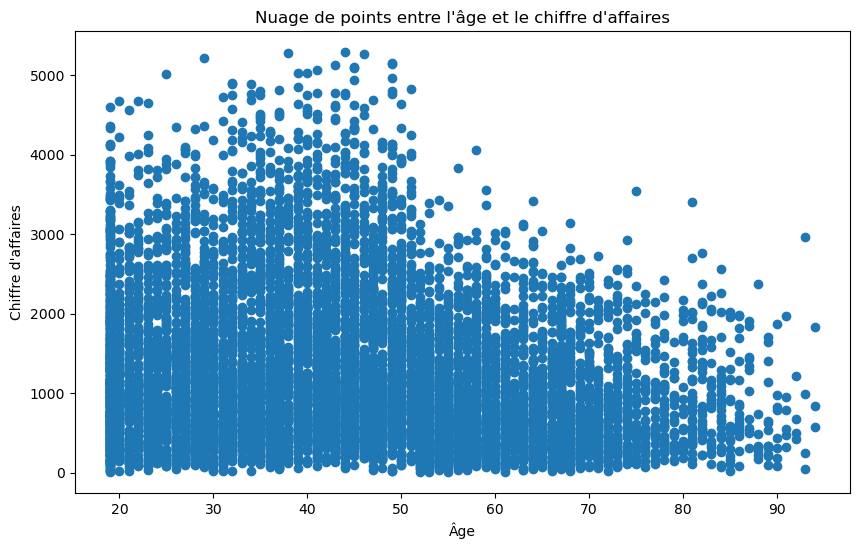

In [441]:
# Création du graphique à points de nuage
plt.figure(figsize=(10, 6))
plt.scatter(df_regression['age'], df_regression['ca'])
plt.title('Nuage de points entre l\'âge et le chiffre d\'affaires')
plt.xlabel('Âge')
plt.ylabel('Chiffre d\'affaires')
plt.show()

In [442]:
df_regression_client = df_regression.groupby('age').agg(ca=('ca', np.mean))
df_regression_client.reset_index(inplace=True)
df_regression_client.head()

,age,ca
0,19.0,1410.567849
1,20.0,1246.075103
2,21.0,1288.219517
3,22.0,1449.868560
4,23.0,1230.794706


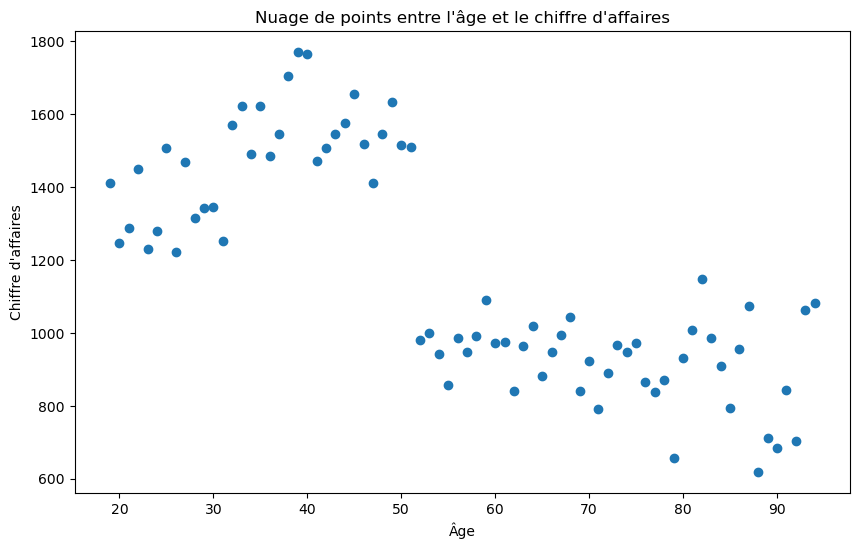

In [443]:
# Création du graphique à points de nuage
plt.figure(figsize=(10, 6))
plt.scatter(df_regression_client['age'], df_regression_client['ca'])
plt.title('Nuage de points entre l\'âge et le chiffre d\'affaires')
plt.xlabel('Âge')
plt.ylabel('Chiffre d\'affaires')
plt.show()

# Etape 1 : modèle conceptuel

ca= B+A*age

A: la pente

B: ordonnée à l'origine (intercept)


### Test d'hypothése:

H0: A est égal à 0

H1: A est différent de 0

# Etape 2 : risque

## α=0,05

# Etape 3 : Constat graphique

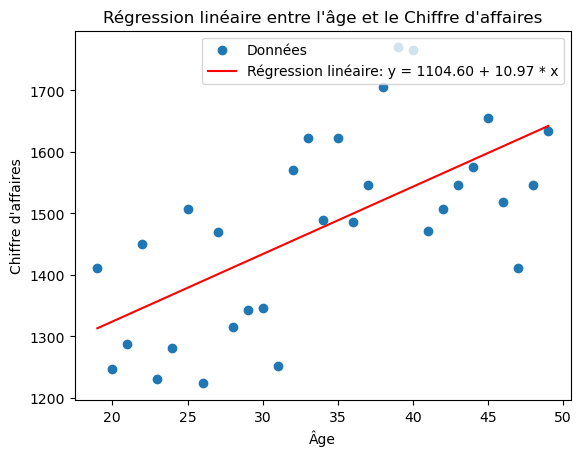

In [444]:
df_regression_client=df_regression_client[df_regression_client.age < 50]
# Données d'exemple
x = df_regression_client.age.values.reshape(-1, 1)
y = df_regression_client.ca.values

# Créer un modèle de régression linéaire
model = LinearRegression()
model.fit(x, y)

# Obtenir les coefficients de la régression
a = model.intercept_
b = model.coef_[0]

# Tracer les données et la ligne de régression
plt.scatter(x, y, label='Données')
plt.plot(x, model.predict(x), color='red', label=f'Régression linéaire: y = {a:.2f} + {b:.2f} * x')
plt.xlabel('Âge')
plt.ylabel("Chiffre d'affaires")
plt.title("Régression linéaire entre l'âge et le Chiffre d'affaires")
plt.legend()
plt.show()

# Etape 4 : Estimation du modèle linéaire

In [445]:
df_regression_client ['intercept'] = 1
lm = sm.OLS(df_regression_client['ca'], df_regression_client[['age','intercept']])
results = lm.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ca   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     20.04
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           0.000108
Time:                        11:56:14   Log-Likelihood:                -191.89
No. Observations:                  31   AIC:                             387.8
Df Residuals:                      29   BIC:                             390.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           10.9695      2.450      4.477      0.000       5.958      15.981
intercept   1104.5957     86.149     12.822      0.000     928.402    1280.789
==============================================================================
Omnibus:                        1.646   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.269
Skew:                           0.284   Prob(JB):                        0.530
Kurtosis:                       2.187   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [446]:
R = np.sqrt(results.rsquared)
R

0.6392542400111076

<div style="border: 1px solid RGB(0,150);" >
<h4 style="margin: auto; padding: 20px; color: red; ">R-squared:40% de la variance de chiffre d'affaire est expliqué par le modéle age</h3>  </div> 

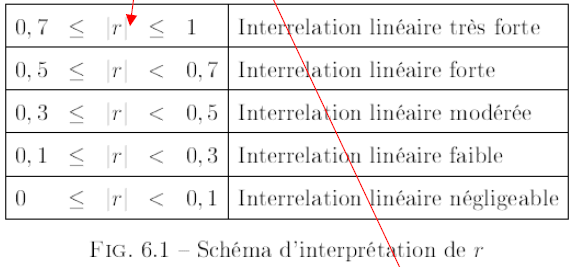

In [447]:
# Insérer une image depuis un fichier local
Image(filename="C:\\Users\\Awatef\\Desktop\\interpretation R.png")


<div style="border: 1px solid RGB(0,150);" >
<h4 style="margin: auto; padding: 20px; color: red; ">selon la charte R<0,7 donc l'interrelation linéaire est forte</h3>  </div> 

# Etape 5: vérification de la normalité des résidus

In [448]:
stats.shapiro(results.resid)

ShapiroResult(statistic=0.9615584015846252, pvalue=0.3206419050693512)

<div style="border: 1px solid RGB(0,150);" >
<h4 style="margin: auto; padding: 20px; color: red; ">on rejette Ho (pvalue>0.05) l'erreur suit une distribution normale</h3>  </div> 

# Etape 6: prévisions

In [449]:
age=39
x= results.get_prediction([age,1])
x.summary_frame(0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1532.407352,25.109252,1481.053166,1583.761538,1277.600282,1787.214421


<div style="border: 1px solid RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color: blue ; "> 2.4 Analyse bivarié entre âge (quanti) et la fréquence d’achat(quanti)
</h3>
</div>

In [450]:
df_regression.head()

,genre,age,fr_achat,ca
client_id,,,,
c_1,m,68.0,43,629.02
c_10,m,67.0,58,1353.60
c_100,m,31.0,8,254.85
c_1000,f,57.0,126,2291.88
c_1001,m,41.0,103,1823.85


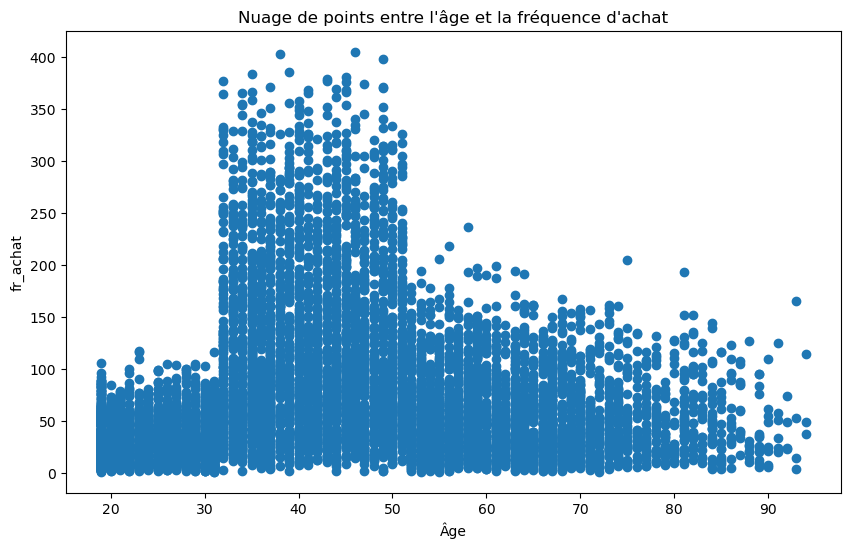

In [451]:
# Création du graphique à points de nuage
plt.figure(figsize=(10, 6))
plt.scatter(df_regression['age'], df_regression['fr_achat'])
plt.title("Nuage de points entre l\'âge et la fréquence d'achat")
plt.xlabel('Âge')
plt.ylabel('fr_achat')
plt.show()

In [452]:
df_regression_achat = df_regression.groupby('age').agg(fr_achat=('fr_achat', np.mean))
df_regression_achat.reset_index(inplace=True)
df_regression_achat.head()

,age,fr_achat
0,19.0,35.462243
1,20.0,30.972414
2,21.0,32.489655
3,22.0,35.024000
4,23.0,33.301471


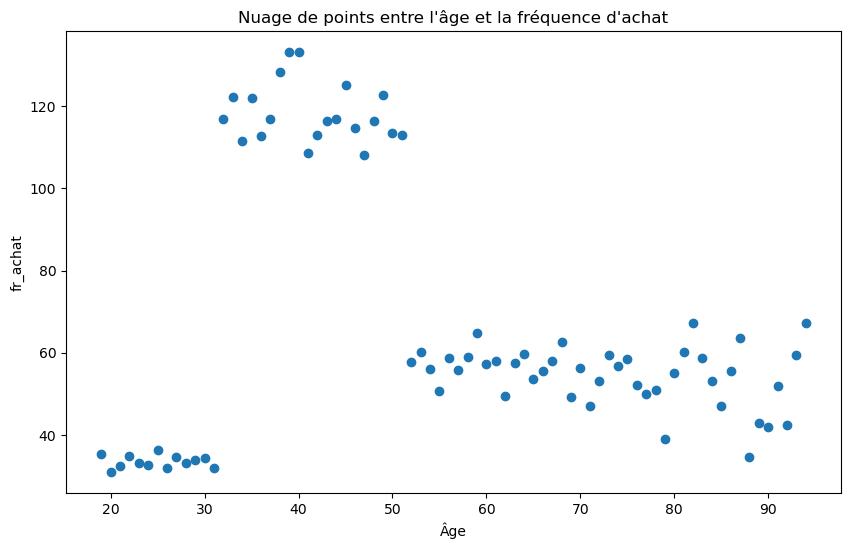

In [453]:
# Création du graphique à points de nuage
plt.figure(figsize=(10, 6))
plt.scatter(df_regression_achat['age'], df_regression_achat['fr_achat'])
plt.title("Nuage de points entre l\'âge et la fréquence d'achat")
plt.xlabel('Âge')
plt.ylabel('fr_achat')
plt.show()

# Etape 1:le modèle conceptuel: ¶
l'age des clients influence fr d'achat des livres achetés
# Etape 2: fixer le risque
α=0,05


# Etape3: Prérequis

## Test de normalité pour tout les sous-groupes 
'
le test d'hypothére de normalité(shapiro)

H0 l'echantillon suit une loi normale

H1 l'echantillon ne suit pas une loi normale

si p-value < 0.05 on rejette H0 et on accepte H1 cà dire l'echantillon ne suit pas une loi normale

si p-value > 0.05 on accepte H0 l'echantillon suit une loi normale

In [454]:
df_regression.head()

,genre,age,fr_achat,ca
client_id,,,,
c_1,m,68.0,43,629.02
c_10,m,67.0,58,1353.60
c_100,m,31.0,8,254.85
c_1000,f,57.0,126,2291.88
c_1001,m,41.0,103,1823.85


In [455]:
gp1=df_regression[df_regression['age']<32].fr_achat
shapiro(gp1)

ShapiroResult(statistic=0.9511523246765137, pvalue=7.606296226126126e-27)

<div style="border: 1px solid RGB(0,150);" >
<h4 style="margin: auto; padding: 20px; color: red; ">p-value < 0.05 on rejette H0 et on accepte H1 cà dire l'echantillon ne suit pas une loi normale</h3>  </div> 

In [456]:
gp2=df_regression[(df_regression['age']>=32) & (df_regression['age']<52)].fr_achat
shapiro(gp2)

ShapiroResult(statistic=0.9117395281791687, pvalue=1.744042055714024e-40)

<div style="border: 1px solid RGB(0,150);" >
<h4 style="margin: auto; padding: 20px; color: red; ">p-value < 0.05 on rejette H0 et on accepte H1 cà dire l'echantillon ne suit pas une loi normale</h3>  </div> 

In [457]:
gp3=df_regression[df_regression['age']>=52].fr_achat
shapiro(gp3)

ShapiroResult(statistic=0.9231436848640442, pvalue=1.727436982802631e-36)

<div style="border: 1px solid RGB(0,150);" >
<h4 style="margin: auto; padding: 20px; color: red; ">p-value < 0.05 on rejette H0 et on accepte H1 cà dire l'echantillon ne suit pas une loi normale</h3>  </div>

<div style="border: 1px solid RGB(0,150);" >
<h4 style="margin: auto; padding: 20px; color: red; ">puisque les 3 p-value sont < à 0.05 ceci nous eméne à passer un test non paramétrique</h3>  </div>

# Test d'egalité des mediannes (de kruskal-wallis)
'
## l'hypothése
H0 toutes les mediannes de sous-groupes sont egales

H1 au moins un sous-groupe a une medianne différentes des autres

si p-value < 0.05 on rejette H0 et on accepte H1 cà dire au moins un sous-groupe a une medianne différentes des autres

si p-value > 0.05 on accepte H0 toutes les mediannes de sous-groupes sont egales

In [458]:
kruskal(gp1,gp2,gp3)

KruskalResult(statistic=2515.93376215784, pvalue=0.0)

<div style="border: 1px solid RGB(0,150);" >
<h4 style="margin: auto; padding: 20px; color: red; ">p-value < 0.05 on rejette H0 et on accepte H1 c à dire au moins un sous-groupe a une medianne différentes des autres donc L'âge influence la fréquence d’achat</h3>  </div> 

<div style="border: 1px solid RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color: blue ; "> 2.5 Analyse bivarié entre âge (quanti) et la taille du panier(quanti)
</h3>
</div>

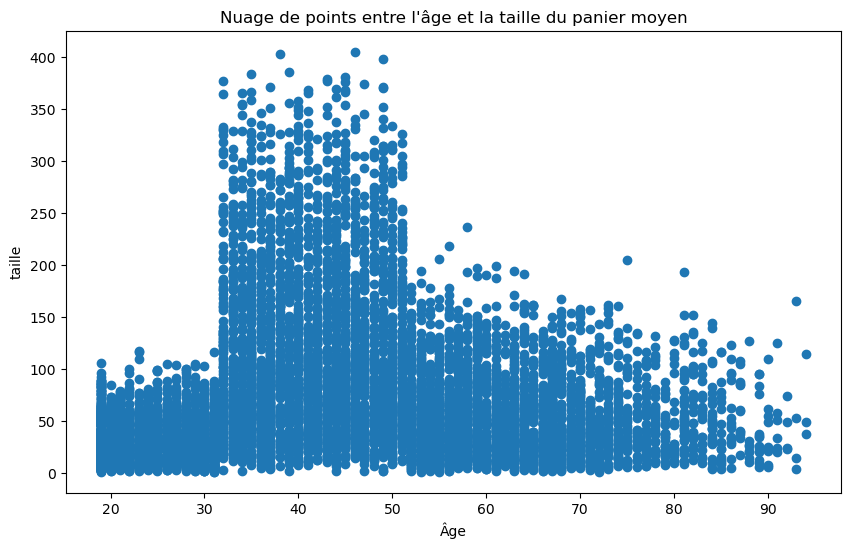

In [461]:
#Création du graphique à points de nuage
plt.figure(figsize=(10, 6))
plt.scatter(df_regression_taille['age'], df_regression_taille['taille'])
plt.title("Nuage de points entre l\'âge et la taille du panier moyen")
plt.xlabel('Âge')
plt.ylabel('taille')
plt.show()

In [462]:
df_regression_taille = df_regression_taille.groupby('age').agg(taille=('taille', np.mean))
df_regression_taille.reset_index(inplace=True)
df_regression_taille.head()

,age,taille
0,19.0,35.462243
1,20.0,30.972414
2,21.0,32.489655
3,22.0,35.024000
4,23.0,33.301471


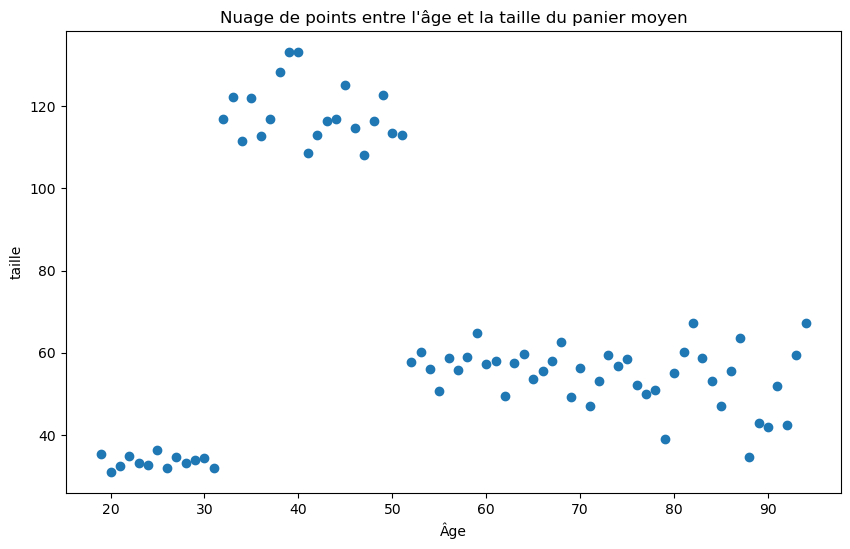

In [463]:
#Création du graphique à points de nuage
plt.figure(figsize=(10, 6))
plt.scatter(df_regression_taille['age'], df_regression_taille['taille'])
plt.title("Nuage de points entre l\'âge et la taille du panier moyen")
plt.xlabel('Âge')
plt.ylabel('taille')
plt.show()

# Test d'egalité des mediannes (de kruskal-wallis) 

## l'hypothése 
H0 toutes les mediannes de sous-groupes sont egales

H1 au moins un sous-groupe a une medianne différentes des autres

si p-value < 0.05 on rejette H0 et on accepte H1 cà dire au moins un sous-groupe a une medianne différentes des autres

si p-value > 0.05 on accepte H0 toutes les mediannes de sous-groupes sont egales

In [468]:
df_regression.head()

,genre,taille,age,fr_achat,ca
client_id,,,,,
c_1,m,43,68.0,43,629.02
c_10,m,58,67.0,58,1353.60
c_100,m,8,31.0,8,254.85
c_1000,f,126,57.0,126,2291.88
c_1001,m,103,41.0,103,1823.85


In [482]:
grp1=df_regression[df_regression['age']<32].taille
shapiro(grp1)

ShapiroResult(statistic=0.9511523246765137, pvalue=7.606296226126126e-27)

In [483]:
grp2=df_regression[(df_regression['age']>=32) & (df_regression['age']<52)].taille
shapiro(grp2)

ShapiroResult(statistic=0.9117395281791687, pvalue=1.744042055714024e-40)

In [484]:
grp3=df_regression[df_regression['age']>=52].taille
shapiro(grp3)

ShapiroResult(statistic=0.9231436848640442, pvalue=1.727436982802631e-36)

<div style="border: 1px solid RGB(0,150);" >
<h4 style="margin: auto; padding: 20px; color: red; ">p-value < 0.05 puisque les 3 p-value sont < à 0.05 ceci nous eméne à passer un test non paramétrique </h3>  </div> 

In [485]:
kruskal(grp1,grp2,grp3)

KruskalResult(statistic=2515.93376215784, pvalue=0.0)

<div style="border: 1px solid RGB(0,150);" >
<h4 style="margin: auto; padding: 20px; color: red; ">p-value < 0.05 on rejette H0 et on accepte H1 c à dire au moins un sous-groupe a une medianne différentes des autres donc l'âge influence la taille de panier </h3>  </div> 